<a href="https://colab.research.google.com/github/estevaovukelic/Return_Calculation_Portfolio_Ibovespa_4/blob/main/Return_Calculation_Portfolio_Ibovespa_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Securities Portfolio - Return Calculation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

## Carteira composta pelas ações da: 
### JBS S.A., 
### Marfrig Global Foods S.A., 
### Lojas Americanas S.A. e 
### Ultrapar Participações S.A.


***

## Carregar dados do Yahoo Finance
https://finance.yahoo.com/

In [ ]:
tickers = ['JBSS3.SA', 'MRFG3.SA', 'LAME4.SA', 'UGPA3.SA']
port = pd.DataFrame()
for t in tickers:
    port[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1')['Adj Close']

In [ ]:
port.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2254 entries, 2012-01-02 to 2021-02-08
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   JBSS3.SA  2254 non-null   float64
 1   MRFG3.SA  2254 non-null   float64
 2   LAME4.SA  2254 non-null   float64
 3   UGPA3.SA  2254 non-null   float64
dtypes: float64(4)
memory usage: 88.0 KB


In [ ]:
port.head()

,JBSS3.SA,MRFG3.SA,LAME4.SA,UGPA3.SA
Date,,,,
2012-01-02,5.043145,8.99,7.246142,12.944519
2012-01-03,5.195695,8.94,7.275459,13.316558
2012-01-04,5.294405,9.05,7.260799,13.668378
2012-01-05,5.384140,8.95,7.265685,13.571325
2012-01-06,5.446956,8.94,7.255913,13.462139


In [ ]:
port.tail()

,JBSS3.SA,MRFG3.SA,LAME4.SA,UGPA3.SA
Date,,,,
2021-02-02,24.52,13.55,25.250000,22.830000
2021-02-03,24.83,14.07,25.250000,23.450001
2021-02-04,25.10,14.28,24.809999,23.309999
2021-02-05,25.24,14.37,24.750000,23.920000
2021-02-08,25.60,14.43,24.520000,23.860001


### Normalização para 100:


$$\frac {P_t}{P_0} * 100
$$

In [ ]:
port.iloc[0]

JBSS3.SA     5.043145
MRFG3.SA     8.990000
LAME4.SA     7.246142
UGPA3.SA    12.944519
Name: 2012-01-02 00:00:00, dtype: float64

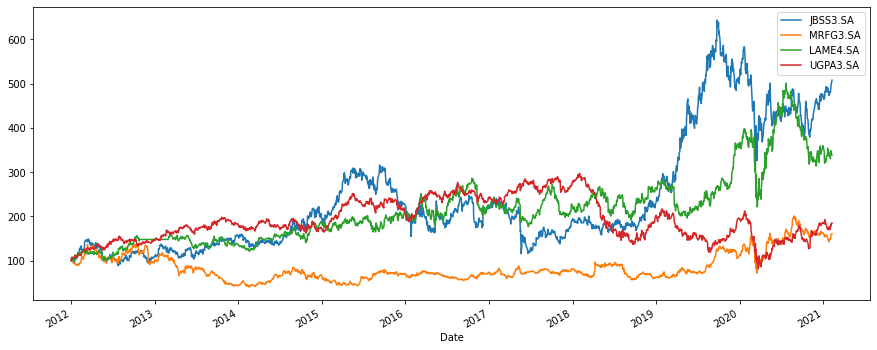

In [ ]:
(port / port.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Cálculo do Retorno Simples do Portfólio de Ações

In [ ]:
perform = (port / port.shift(1)) - 1
perform.head()

,JBSS3.SA,MRFG3.SA,LAME4.SA,UGPA3.SA
Date,,,,
2012-01-02,NaN,NaN,NaN,NaN
2012-01-03,0.030249,-0.005562,0.004046,0.028741
2012-01-04,0.018998,0.012304,-0.002015,0.026420
2012-01-05,0.016949,-0.011050,0.000673,-0.007101
2012-01-06,0.011667,-0.001117,-0.001345,-0.008045


In [ ]:
perform.tail()

,JBSS3.SA,MRFG3.SA,LAME4.SA,UGPA3.SA
Date,,,,
2021-02-02,0.011969,0.018032,0.055161,0.027453
2021-02-03,0.012643,0.038376,0.000000,0.027157
2021-02-04,0.010874,0.014925,-0.017426,-0.005970
2021-02-05,0.005578,0.006303,-0.002418,0.026169
2021-02-08,0.014263,0.004175,-0.009293,-0.002508


In [ ]:
perform_anual = perform.mean()* 250
perform_anual

JBSS3.SA    0.304888
MRFG3.SA    0.167478
LAME4.SA    0.204335
UGPA3.SA    0.131478
dtype: float64

### Performance da taxa de retorno simples anual das ações em ordem decrescente. 

In [ ]:
perform_anual.sort_values(ascending=False)

JBSS3.SA    0.304888
LAME4.SA    0.204335
MRFG3.SA    0.167478
UGPA3.SA    0.131478
dtype: float64

***

### Composição da carteira 'A' de ações: 55% da JBS, 5% da Marfrig, 5% Lojas Americanas e 35% Ultrapar.

In [ ]:
distrib_A = pd.DataFrame([["JBS",0.55],[ "MARFRIG", 0.05],["AMERICANAS", 0.05],["ULTRAPAR",0.35]],index=range(0,4), columns= ['Ação', 'Peso %'])
distrib_A

,Ação,Peso %
0,JBS,0.55
1,MARFRIG,0.05
2,AMERICANAS,0.05
3,ULTRAPAR,0.35


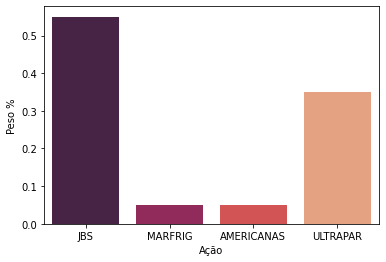

In [ ]:
sns.barplot(x= distrib_A["Ação"], y=distrib_A["Peso %"], palette="rocket");

### Performance Anual da Carteira A:

In [ ]:
np.dot(perform, distrib_A['Peso %'])

array([       nan, 0.02662047, 0.02021047, ..., 0.00376609, 0.01242109,
       0.00671091])

In [ ]:
np.dot(perform_anual, distrib_A['Peso %'])

0.23229632356768742

In [ ]:
port_a = str(round(np.dot(perform_anual, distrib_A['Peso %']), 4)*100 ) + ' %'
print ("Performance da carteira A:",port_a)

Performance da carteira A: 23.23 %


In [ ]:
perform_anual1 = perform.mean()* 250
perform_anual1

JBSS3.SA    0.304888
MRFG3.SA    0.167478
LAME4.SA    0.204335
UGPA3.SA    0.131478
dtype: float64

***

### Composição da carteira 'B' de ações: 10% da JBS, 60% da Marfrig, 25% Lojas Americanas e 5% Ultrapar.

In [ ]:
distrib_B  = pd.DataFrame([["JBS",0.10],[ "MARFRIG", 0.60],["AMERICANAS", 0.25],["ULTRAPAR",0.05]],index=range(0,4), columns= ['Ação', 'Peso %'])
distrib_B

,Ação,Peso %
0,JBS,0.10
1,MARFRIG,0.60
2,AMERICANAS,0.25
3,ULTRAPAR,0.05


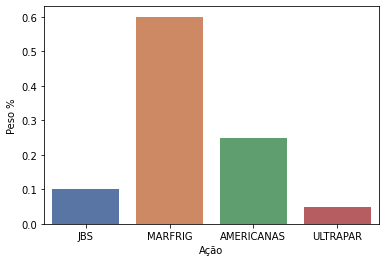

In [ ]:
sns.barplot(x= distrib_B["Ação"], y=distrib_B["Peso %"], palette="deep");

### Performance Anual da Carteira B:

In [ ]:
np.dot(perform_anual, distrib_B["Peso %"])

0.1886331122327778

In [ ]:
port_b = str(round(np.dot(perform_anual, distrib_B['Peso %']), 4)*100 ) + ' %'
print ("Performance da carteira B:",port_b)

Performance da carteira B: 18.86 %


In [ ]:
print ('Carteira A:',port_a)
print ('Carteira B:',port_b)

Carteira A: 23.23 %
Carteira B: 18.86 %
